<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-5-hough-lanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hough Transfrom

In [1]:
#https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html

In [2]:
import sys
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19-YI3DtH84A-JiDitR-se4-_sQZHYfbE' -O lanes1.jpg

--2024-09-13 00:10:07--  https://docs.google.com/uc?export=download&id=19-YI3DtH84A-JiDitR-se4-_sQZHYfbE
Resolving docs.google.com (docs.google.com)... 142.250.125.138, 142.250.125.113, 142.250.125.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19-YI3DtH84A-JiDitR-se4-_sQZHYfbE&export=download [following]
--2024-09-13 00:10:07--  https://drive.usercontent.google.com/download?id=19-YI3DtH84A-JiDitR-se4-_sQZHYfbE&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.202.132, 2607:f8b0:4001:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8767 (8.6K) [image/jpeg]
Saving to: ‘lanes1.jpg’

lanes1.jpg          100%[===================>]   8.56K  --.-KB/s    in 0s      

2024-

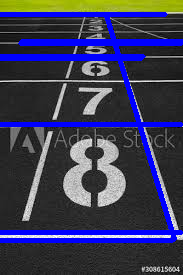

In [5]:
# Read image
img = cv2.imread('lanes1.jpg', cv2.IMREAD_COLOR)
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=130, minLineLength=10, maxLineGap=250)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
cv2_imshow(img)
# cv2.imshow("Result Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap) → lines
Parameters:
image – 8bit, single-channel binary image, canny edge를 선 적용.
rho – r 값의 범위 (0 ~ 1 실수)
theta – 𝜃 값의 범위(0 ~ 180 정수)
threshold – 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.
minLineLength – 선의 최소 길이. 이 값보다 작으면 reject.
maxLineGap – 선과 선사이의 최대 허용간격. 이 값보다 작으며 reject.